In [1]:
import math
import pandas as pd
import numpy as np
import random
from math import sqrt
import matplotlib.pyplot as plt
import h2o
from h2o.estimators import H2OGradientBoostingEstimator


h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.11+9-LTS-194, mixed mode)
  Starting server from C:\Users\Gerd\venvs\h2o\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Gerd\AppData\Local\Temp\tmp4bjmn1i_
  JVM stdout: C:\Users\Gerd\AppData\Local\Temp\tmp4bjmn1i_\h2o_Gerd_started_from_python.out
  JVM stderr: C:\Users\Gerd\AppData\Local\Temp\tmp4bjmn1i_\h2o_Gerd_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month and 28 days
H2O_cluster_name:,H2O_from_python_Gerd_mpc823
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.975 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"accepting new members, healthy"


In [6]:
number_of_records = 2000

ids = [x for x in range(0,number_of_records)]
random_category = ['A', 'B', 'C', 'D']
age = [round(random.uniform(18.0, 75.0), 2) for x in range(0, number_of_records)]
healthyEating = [round(x, 0) for x in np.random.normal(loc=5, scale=1.0, size=number_of_records)]
activeLifestyle = [round(x, 0) for x in np.random.normal(loc=5, scale=1.0, size=number_of_records)]

dataframe = pd.DataFrame(ids, columns=['id'])
dataframe['random_category'] = [random_category[random.randint(0,len(random_category)-1)] for x in range(0, len(ids))]
dataframe['age'] = age
dataframe['healthyEating'] = healthyEating
dataframe['activeLifestyle'] = activeLifestyle
dataframe['activeLifestyle'] = np.where(dataframe['age'] < 30, dataframe['activeLifestyle'] + 1 ,  dataframe['activeLifestyle'])
dataframe['income'] = 20000 + ((dataframe['age']*3)**2)
dataframe['income'] = np.where(dataframe['activeLifestyle'] > 5, dataframe['income'] * 0.9, dataframe['income'])
dataframe['income'] = np.where(dataframe['healthyEating'] > 5, dataframe['income'] * 1.1, dataframe['income'])

#
# add noise to the income column
#
dataframe['income'] = dataframe['income'] + random.randint(0,4000)
dataframe['income'] = np.ceil(dataframe['income']/100)*100


(array([332., 300., 301., 221., 208., 186., 172., 156.,  98.,  26.]),
 array([23100., 28780., 34460., 40140., 45820., 51500., 57180., 62860.,
        68540., 74220., 79900.]),
 <BarContainer object of 10 artists>)

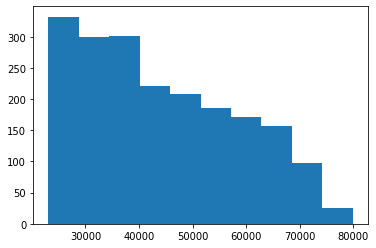

In [7]:
plt.hist(dataframe['income'])

In [13]:
#
# create frames in h2o instance
#
dataframe = h2o.H2OFrame(dataframe)
train, validation, test = dataframe.split_frame(ratios=[0.8, 0.1], destination_frames=["train", "validation", "test"], seed=123)

'''
train = h2o.get_frame("train")
validation = h2o.get_frame("validation")
test = h2o.get_frame("test")
'''

Parse progress: |█████████████████████████████████████████████████████████| 100%


'\ntrain = h2o.get_frame("train")\nvalidation = h2o.get_frame("validation")\ntest = h2o.get_frame("test")\n'

In [14]:
y = 'income'
ignoreFields = [y, 'id']
x = [i for i in train.names if i not in ignoreFields]

In [19]:
#
# using a validation frame
#
# model = H2OGradientBoostingEstimator(model_id = "gbm-coursera", ntrees=75, max_depth=5)
# model.train(x, y, train, validation_frame=validation)


#
# using cross validation
#
model = H2OGradientBoostingEstimator(model_id = "gbm-coursera", ntrees=75, nfolds=5, max_depth=5)
model.train(x, y, train, validation_frame=validation)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [ ]:
overfitted_model = H2OGradientBoostingEstimator(model_id = "gbm-coursera-overfitted", ntrees=1000, max_depth=10)
overfitted.train(x, y, train, validation_frame=validation)

In [21]:
#
# Mean Average Error
#
#model.mae(train=True)
print(model.mae(valid=True))
print(model.mae(xval=True))

167.60411380201225
167.62986014423686
